# IPL winning probability

                                                                                                -Uday kumar S

Students have to predict the IPL winning probability Using Random-Forest-Classifier The dataset has 2 files: matches.csv having every match detail from 2008 to 2019 and deliveries.csv having ball by ball detail for every match.

## Importing all the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Loading the Data-Sets

In [2]:
mat = pd.read_csv('/Users/rogudays/Documents/Adverks-Data_Science/Assignement/IPL winning probability/matches.csv')
deliv = pd.read_csv('/Users/rogudays/Documents/Adverks-Data_Science/Assignement/IPL winning probability/deliveries.csv')

In [3]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Understanding the Data

In [5]:
deliv.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [6]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
deliv.shape

(179078, 21)

In [8]:
mat.shape

(756, 18)

## Data Wrangling

### Cleaning and transforming

In [9]:
mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
deliv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
mat.drop('umpire3',axis=1,inplace=True)
mat=mat.replace('Rising Pune Supergiants','Rising Pune Supergiant')
deliv.fillna(0,inplace=True)
mat['winner'].fillna('Draw',inplace=True)
mat['city'].fillna('Mumbai',inplace=True)
mat['player_of_match'].fillna('No one',inplace=True)
mat['umpire2'].fillna('SJA Taufel',inplace=True)
mat['umpire1'].fillna('HDPK Dharmasena',inplace=True)
#mat.columns = mat.columns.str.strip()
deliv.rename(columns={'match_id': 'id'}, inplace=True)

In [12]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel


## Exploratory Data Analysis

In [13]:
print('Total Matches Played:',mat.shape[0])
print(' \n Venues Played At:',mat['city'].unique())     
print(' \n Teams :',mat['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals']


### Number of matches played in the each season

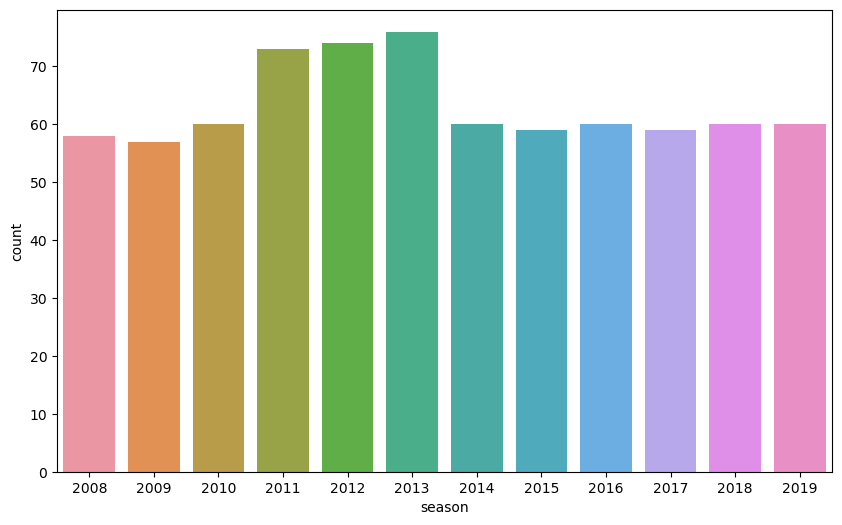

In [14]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=mat)  
plt.show()

### Teams with More Number of Wins

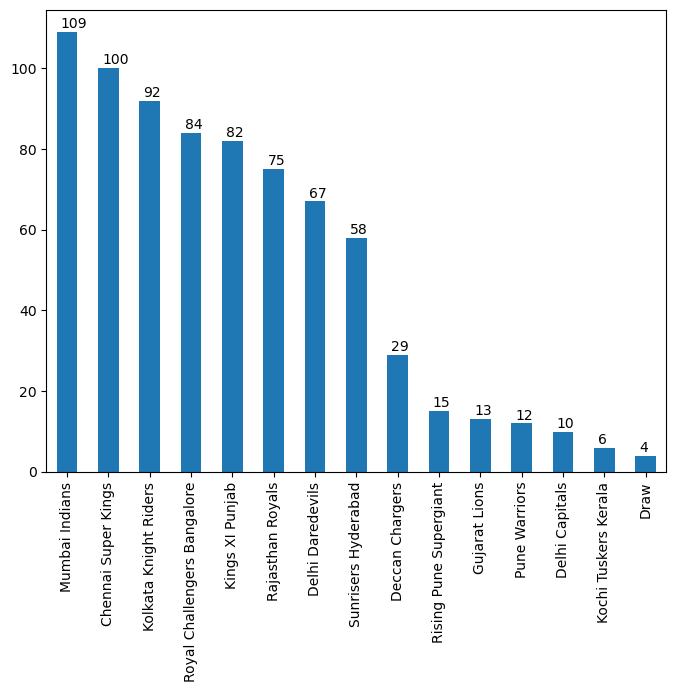

In [15]:
plt.subplots(figsize=(8,6))
wnrs = mat['winner'].value_counts().plot.bar(width=0.5)
for x in wnrs.patches:
  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))
plt.show()

### Toss Decisions

Teams with more number of Toss wins

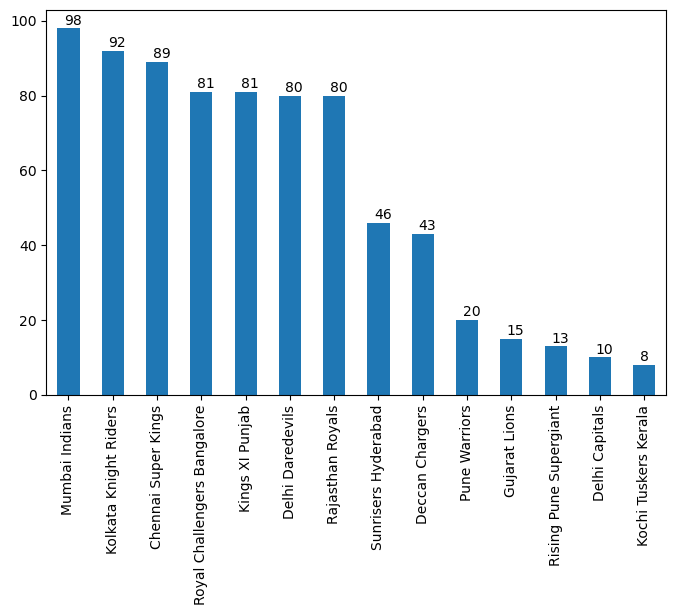

In [16]:
plt.subplots(figsize=(8,5))
ax=mat['toss_winner'].value_counts().plot.bar(width=0.5)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Toss Decisions across Seasons

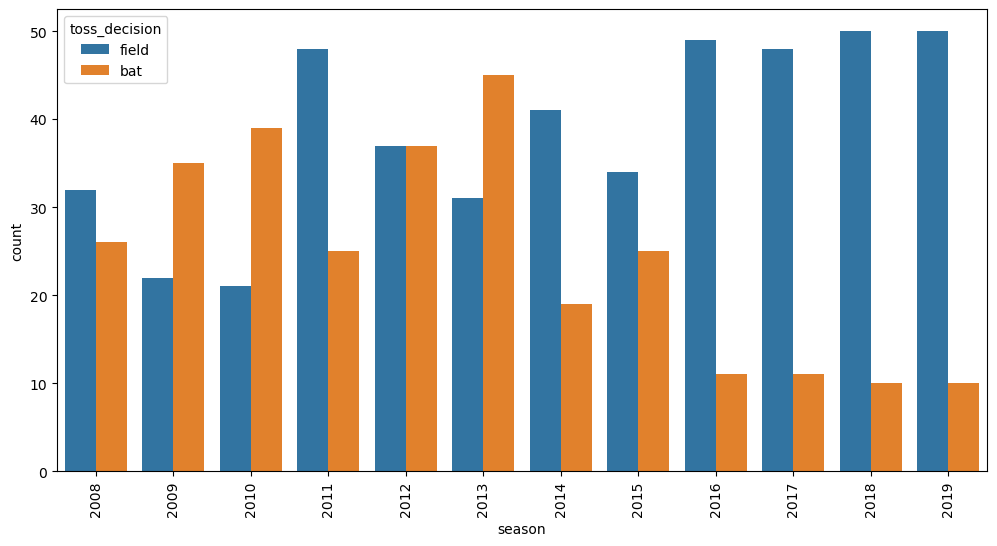

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=mat)
plt.xticks(rotation='vertical')
plt.show()

Toss decision percentage

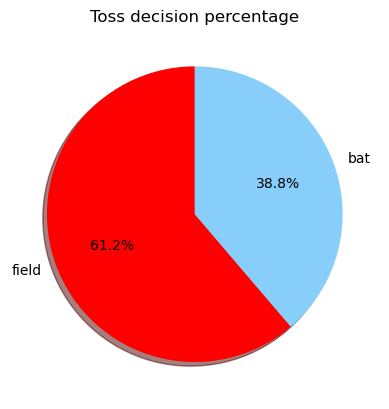

In [18]:
toss = mat.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['r', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Toss Decision with respect to Team

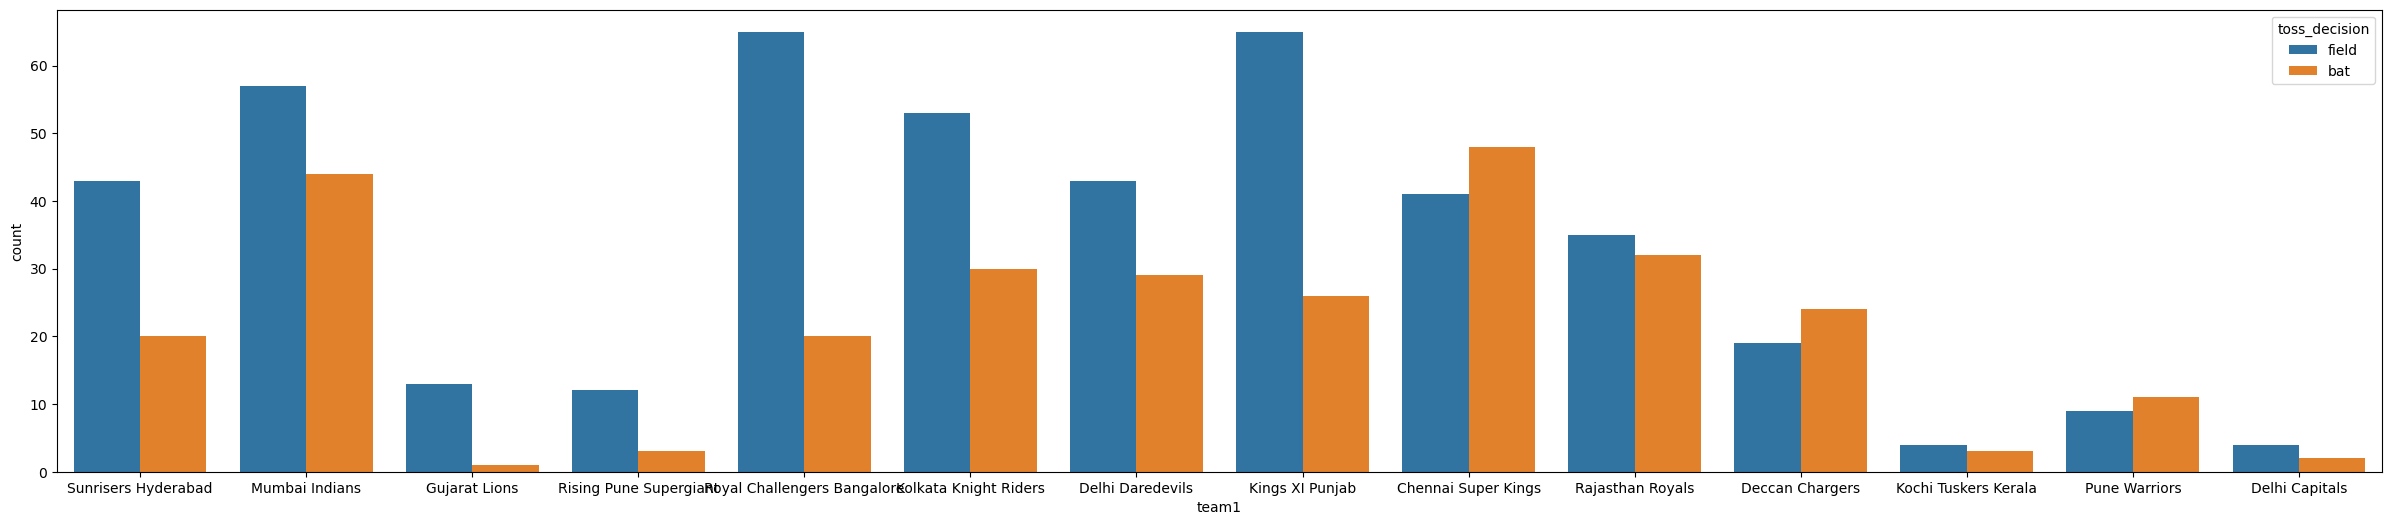

In [19]:
plt.subplots(figsize=(30,6))
sns.countplot(x='team1',hue='toss_decision',data=mat)
plt.show()

The Impact of Winning the Toss on the Probability of Winning

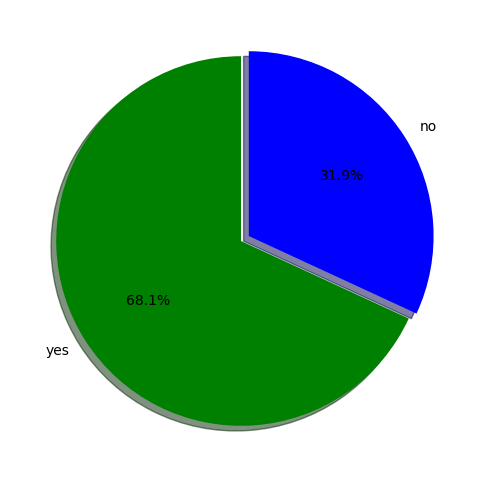

In [20]:
df=mat[mat['toss_winner']==mat['winner']]
sizes=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(sizes,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['g','b'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Sixes and Fours Across the Seasons

In [21]:
d2mat = mat[['id','season']]
d2deliv = deliv[['id','batsman_runs']]
d2 = pd.merge(d2mat,d2deliv,on='id',how='inner')

In [22]:
d24 = d2[d2.batsman_runs == 4]
d26 = d2[d2.batsman_runs == 6]

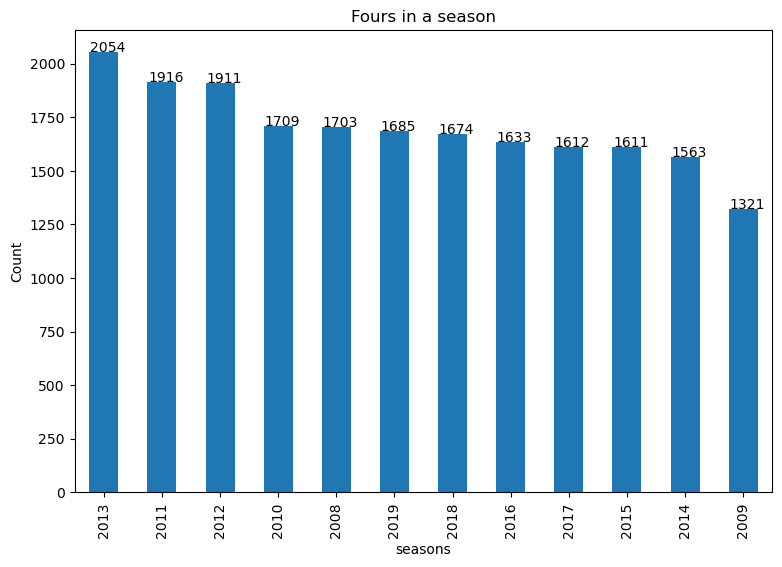

In [23]:
plt.subplots(figsize=(9,6))
d4 = d24['season'].value_counts().plot.bar(width=0.5)
for x in d4.patches:
    d4.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.05))
plt.title('Fours in a season')
plt.xlabel('seasons')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

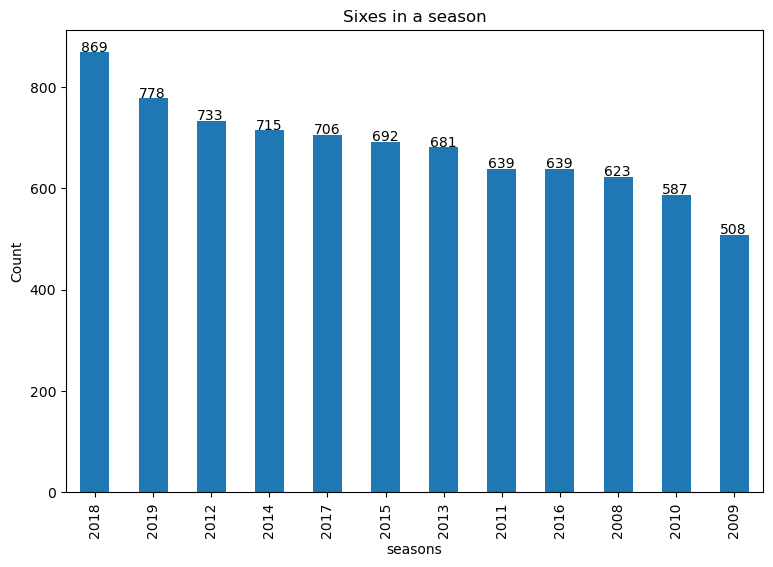

In [24]:
plt.subplots(figsize=(9,6))
d6 = d26['season'].value_counts().plot.bar(width=0.5)
for x in d6.patches:
    d6.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.5))
plt.title('Sixes in a season')
plt.xlabel('seasons')
plt.ylabel('Count')

Runs Across the Seasons

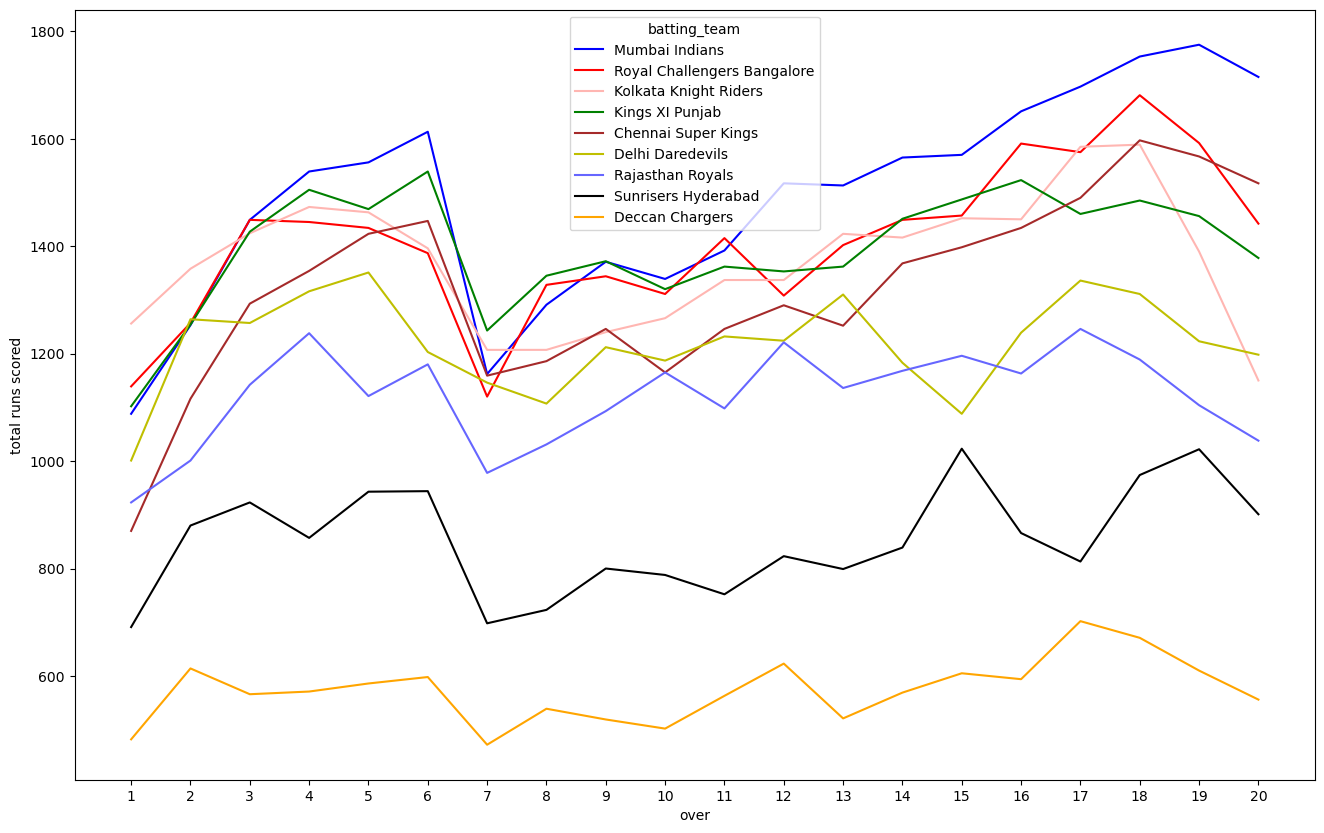

In [25]:
rpo = deliv.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
mpbt=pd.concat([mat['team1'],mat['team2']])
mpbt=mpbt.value_counts().reset_index()
mpbt.columns=['Team','Total Matches']
mpbt['wins']=mat['winner'].value_counts().reset_index()['winner']
mpbt.set_index('Team',inplace=True)
rpo[(mpbt[mpbt['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) 
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

Stadiums where Most Number of matches were held

<AxesSubplot:xlabel='count', ylabel='venue'>

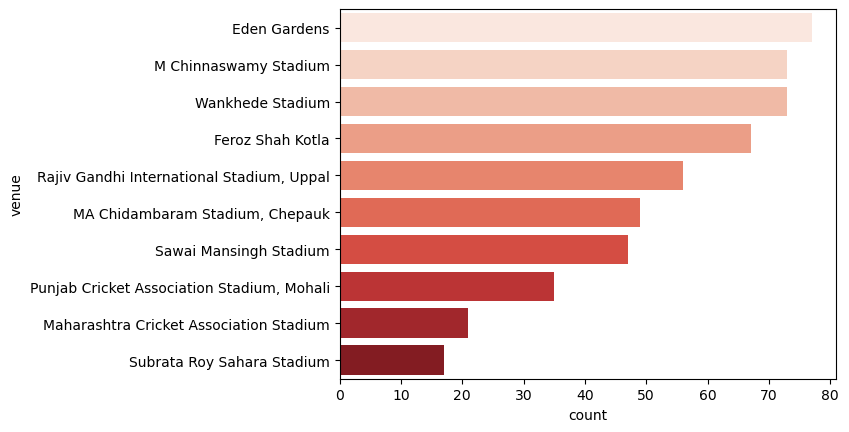

In [26]:
fav_ground = mat['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','count']
sns.barplot(x = 'count',y = 'venue', data = fav_ground[:10], palette = 'Reds')

In [27]:
mat.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','DC'],inplace=True)
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
mat.replace(encode, inplace=True)
mat.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [28]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    mat[i] = le.fit_transform(mat[i])
mat.dtypes 

id                  int64
season              int64
city                int64
date               object
team1               int64
team2               int64
toss_winner         int64
toss_decision       int64
result             object
dl_applied          int64
winner              int64
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue               int64
umpire1            object
umpire2            object
dtype: object

In [29]:
x=mat.drop(['id','season','date','result','dl_applied','winner','player_of_match','umpire1','umpire2'],axis=1)
y=mat['winner']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 
print(x_train,x_test,y_train,y_test)

     city  team1  team2  toss_winner  toss_decision  win_by_runs  \
580    21      2      1            1              1            0   
691    26      9      5            5              1            0   
315    31      4      1            4              0            0   
200    23      9      1            1              1            0   
319     8      3      5            3              0            0   
..    ...    ...    ...          ...            ...          ...   
707     8      5      6            6              1            8   
192     7      6      9            9              1           31   
629    18      1      8            8              1            0   
559    21      9      2            9              0            0   
684    21      6      2            2              1            0   

     win_by_wickets  venue  
580               6      8  
691               5     21  
315               5      6  
200               4      2  
319               5     20  
..       

In [31]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [32]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.3700440528634361


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred) #gives the accuracy of the model
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.499054820415879


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decision Tree

In [34]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=16)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [35]:
y_pred=dtree.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.960352422907489


In [36]:
y_pred=dtree.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 1.0


## Logistic Regression

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.2599118942731278


In [39]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.34593572778827975


## Random Forest Classifier

In [40]:
random_forest=RandomForestClassifier(n_estimators=17,max_depth=5)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=17)

In [41]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.2599118942731278


In [42]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.34593572778827975
